In [7]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision.models as models
import seaborn as sns
from joblib import Parallel, delayed
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
import samples_setup


### Set Paths and variables

In [11]:
FilePath = '/data/zooplankton_data/'
ResultsPath = '/home/ruizsuar/Analysis_zooplankton/Environments/'
PredictionsPath = '/home/ruizsuar/Analysis_zooplankton/Predictions/'
MyWeightsPath = '/home/ruizsuar/Analysis_zooplankton/Weights/'
optimizer = 'adam'
architecture = 'Resnet50'

### Load predictions

In [12]:
# Load predictions
predictions_file = 'Pred_result_' + architecture +'_'+ optimizer +'.pth'
predictions = torch.load(
    PredictionsPath + predictions_file ,
    map_location = torch.device("cpu")
    )
true_labels = predictions[0].numpy()
predicted_labels = predictions[1].numpy()

# Load varaiables 
variables_file = 'Env_result_' + architecture +'_'+optimizer+'.pth'
checkpoint = torch.load(ResultsPath + variables_file ,  weights_only=False)

#### Assess performance

In [13]:
acc_test = accuracy_score(predicted_labels, true_labels)
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')

print('Total accuracy:', acc_test)
print('Presicion Score:', precision)
print('Recall score:', recall )

Total accuracy: 0.8772401433691757
Presicion Score: 0.877487043288558
Recall score: 0.8772401433691757


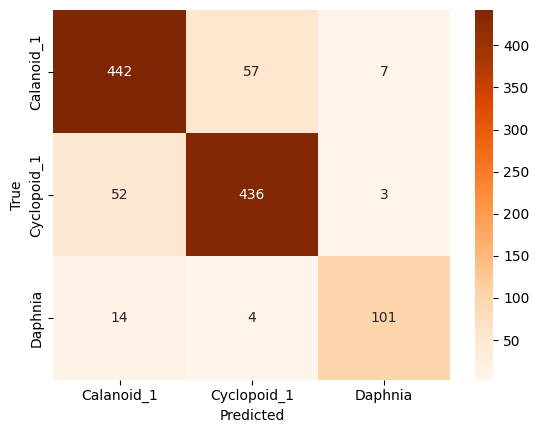

In [14]:
fig = plt.plot()
    
cm = confusion_matrix(true_labels, predicted_labels)
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges',
                 xticklabels = checkpoint['classes_keys'],
                 yticklabels = checkpoint['classes_keys'])
ax.set(xlabel= 'Predicted', ylabel = 'True')
plt.show()

### For loading weights

In [6]:
weights_file = 'Weights_'+ architecture +'_'+ optimizer +'.pth'
weights_path = MyWeightsPath + weights_file
n_classes =  len(checkpoint['classes_keys'])

# Choose corresponding architecture
if architecture == 'Densenet121':
    model = models.densenet121(weights=None)
elif architecture == 'Resnet50':
    model = models.resnet50(weights=None)

# set n_classes and weights    
model.classifier = torch.nn.Linear(
    model.classifier.in_features, 
    n_classes)
model.load_state_dict(torch.load(weights_path))
#model.eval() 

<All keys matched successfully>